## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WineData.csv')
df.head()

Unnamed: 0  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  \
0           0    14.23        1.71  2.43          15.6        127   
1           1    13.20        1.78  2.14          11.2        100   
2           2    13.16        2.36  2.67          18.6        101   
3           3    14.37        1.95  2.50          16.8        113   
4           4    13.24        2.59  2.87          21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [4]:
df.shape

(178, 13)

In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
df1  = df.copy()
df1.head(2)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
df1[df1.columns] = scaler.fit_transform(df1)

In [10]:
df1.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.842105    0.191700  0.572193      0.257732   0.619565       0.627586   
1  0.571053    0.205534  0.417112      0.030928   0.326087       0.575862   
2  0.560526    0.320158  0.700535      0.412371   0.336957       0.627586   
3  0.878947    0.239130  0.609626      0.319588   0.467391       0.989655   
4  0.581579    0.365613  0.807487      0.536082   0.521739       0.627586   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.573840              0.283019         0.593060         0.372014   
1    0.510549              0.245283         0.274448         0.264505   
2    0.611814              0.320755         0.757098         0.375427   
3    0.664557              0.207547         0.558360         0.556314   
4    0.495781              0.490566         0.444795         0.259386   

        Hue     OD280   Proline  
0  0.455285  0.970696  0.561341  
1  0.463415  0.780220  0.550642  
2  0.447154  0.695971  0.646933  
3  0.308943  0.798535  0.857347  
4  0.455285  0.608059  0.325963

### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss = []
for k in range(1, 13):  
    km = KMeans(n_clusters=k)
    km.fit(df1)
    wcss.append(km.inertia_) 

In [13]:
wcss

[95.5995377847106,
 64.5376670238943,
 48.9605171366765,
 44.8440392648056,
 42.757461034842834,
 41.53749415219877,
 38.852565943383254,
 37.227604632068584,
 35.065417451749184,
 33.1024412993873,
 32.68679081581304,
 30.58036632131158]

In [14]:
import matplotlib.pyplot as plt

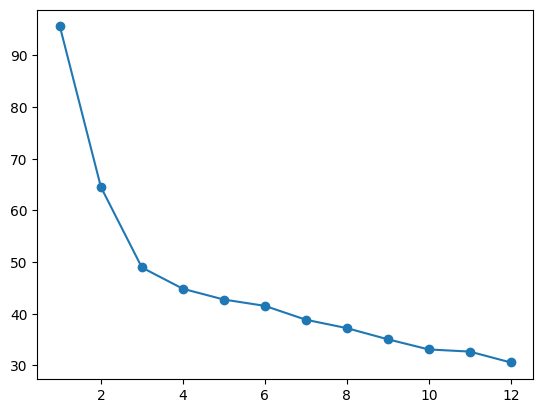

In [15]:
plt.plot(range(1,13),wcss, marker='o')

In [16]:
#!pip uninstall -y kneed
#!pip install kneed


In [17]:
from kneed import KneeLocator as kn
kl = kn(range(1,13), wcss, direction = 'decreasing', curve='convex')

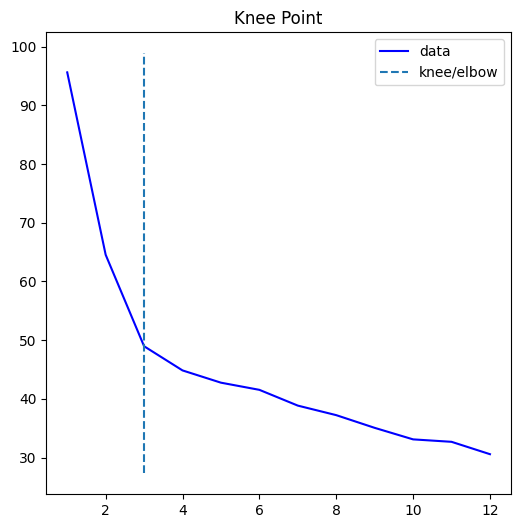

In [18]:
kl.plot_knee()

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [19]:
kmc = KMeans(n_clusters=3)

In [20]:
kmc.fit(df1)
df['cluster'] = kmc.predict(df1)
df.head(10)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   
5    14.20        1.76  2.45          15.2        112           3.27   
6    14.39        1.87  2.45          14.6         96           2.50   
7    14.06        2.15  2.61          17.6        121           2.60   
8    14.83        1.64  2.17          14.0         97           2.80   
9    13.86        1.35  2.27          16.0         98           2.98   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   OD280  Proline  cluster  
0   3.92     1065        2  
1   3.40     1050        2  
2   3.17     1185        2  
3   3.45     1480        2  
4   2.93      735        2  
5   2.85     1450        2  
6   3.58     1290        2  
7   3.58     1295        2  
8   2.85     1045        2  
9   3.55     1045        2

In [21]:
df.cluster.nunique()

3

### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [22]:
cl_anaysis  = df.groupby('cluster').mean()
cl_anaysis

Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
cluster                                                              
0        13.099818    3.160909  2.407455     21.043636   98.654545   
1        12.229524    1.971111  2.245079     20.253968   92.952381   
2        13.719333    1.964000  2.456500     17.278333  107.866667   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
cluster                                                                     
0             1.689818    0.847818              0.457818         1.133636   
1             2.299365    2.160159              0.347778         1.669683   
2             2.845500    2.974833              0.288667         1.927333   

         Color_Intensity       Hue     OD280      Proline  
cluster                                                    
0               6.936545  0.716836  1.709273   624.854545  
1               3.032857  1.058571  2.879841   500.174603  
2               5.462667  1.071833  3.157333  1117.816667

In [23]:
import seaborn as sns

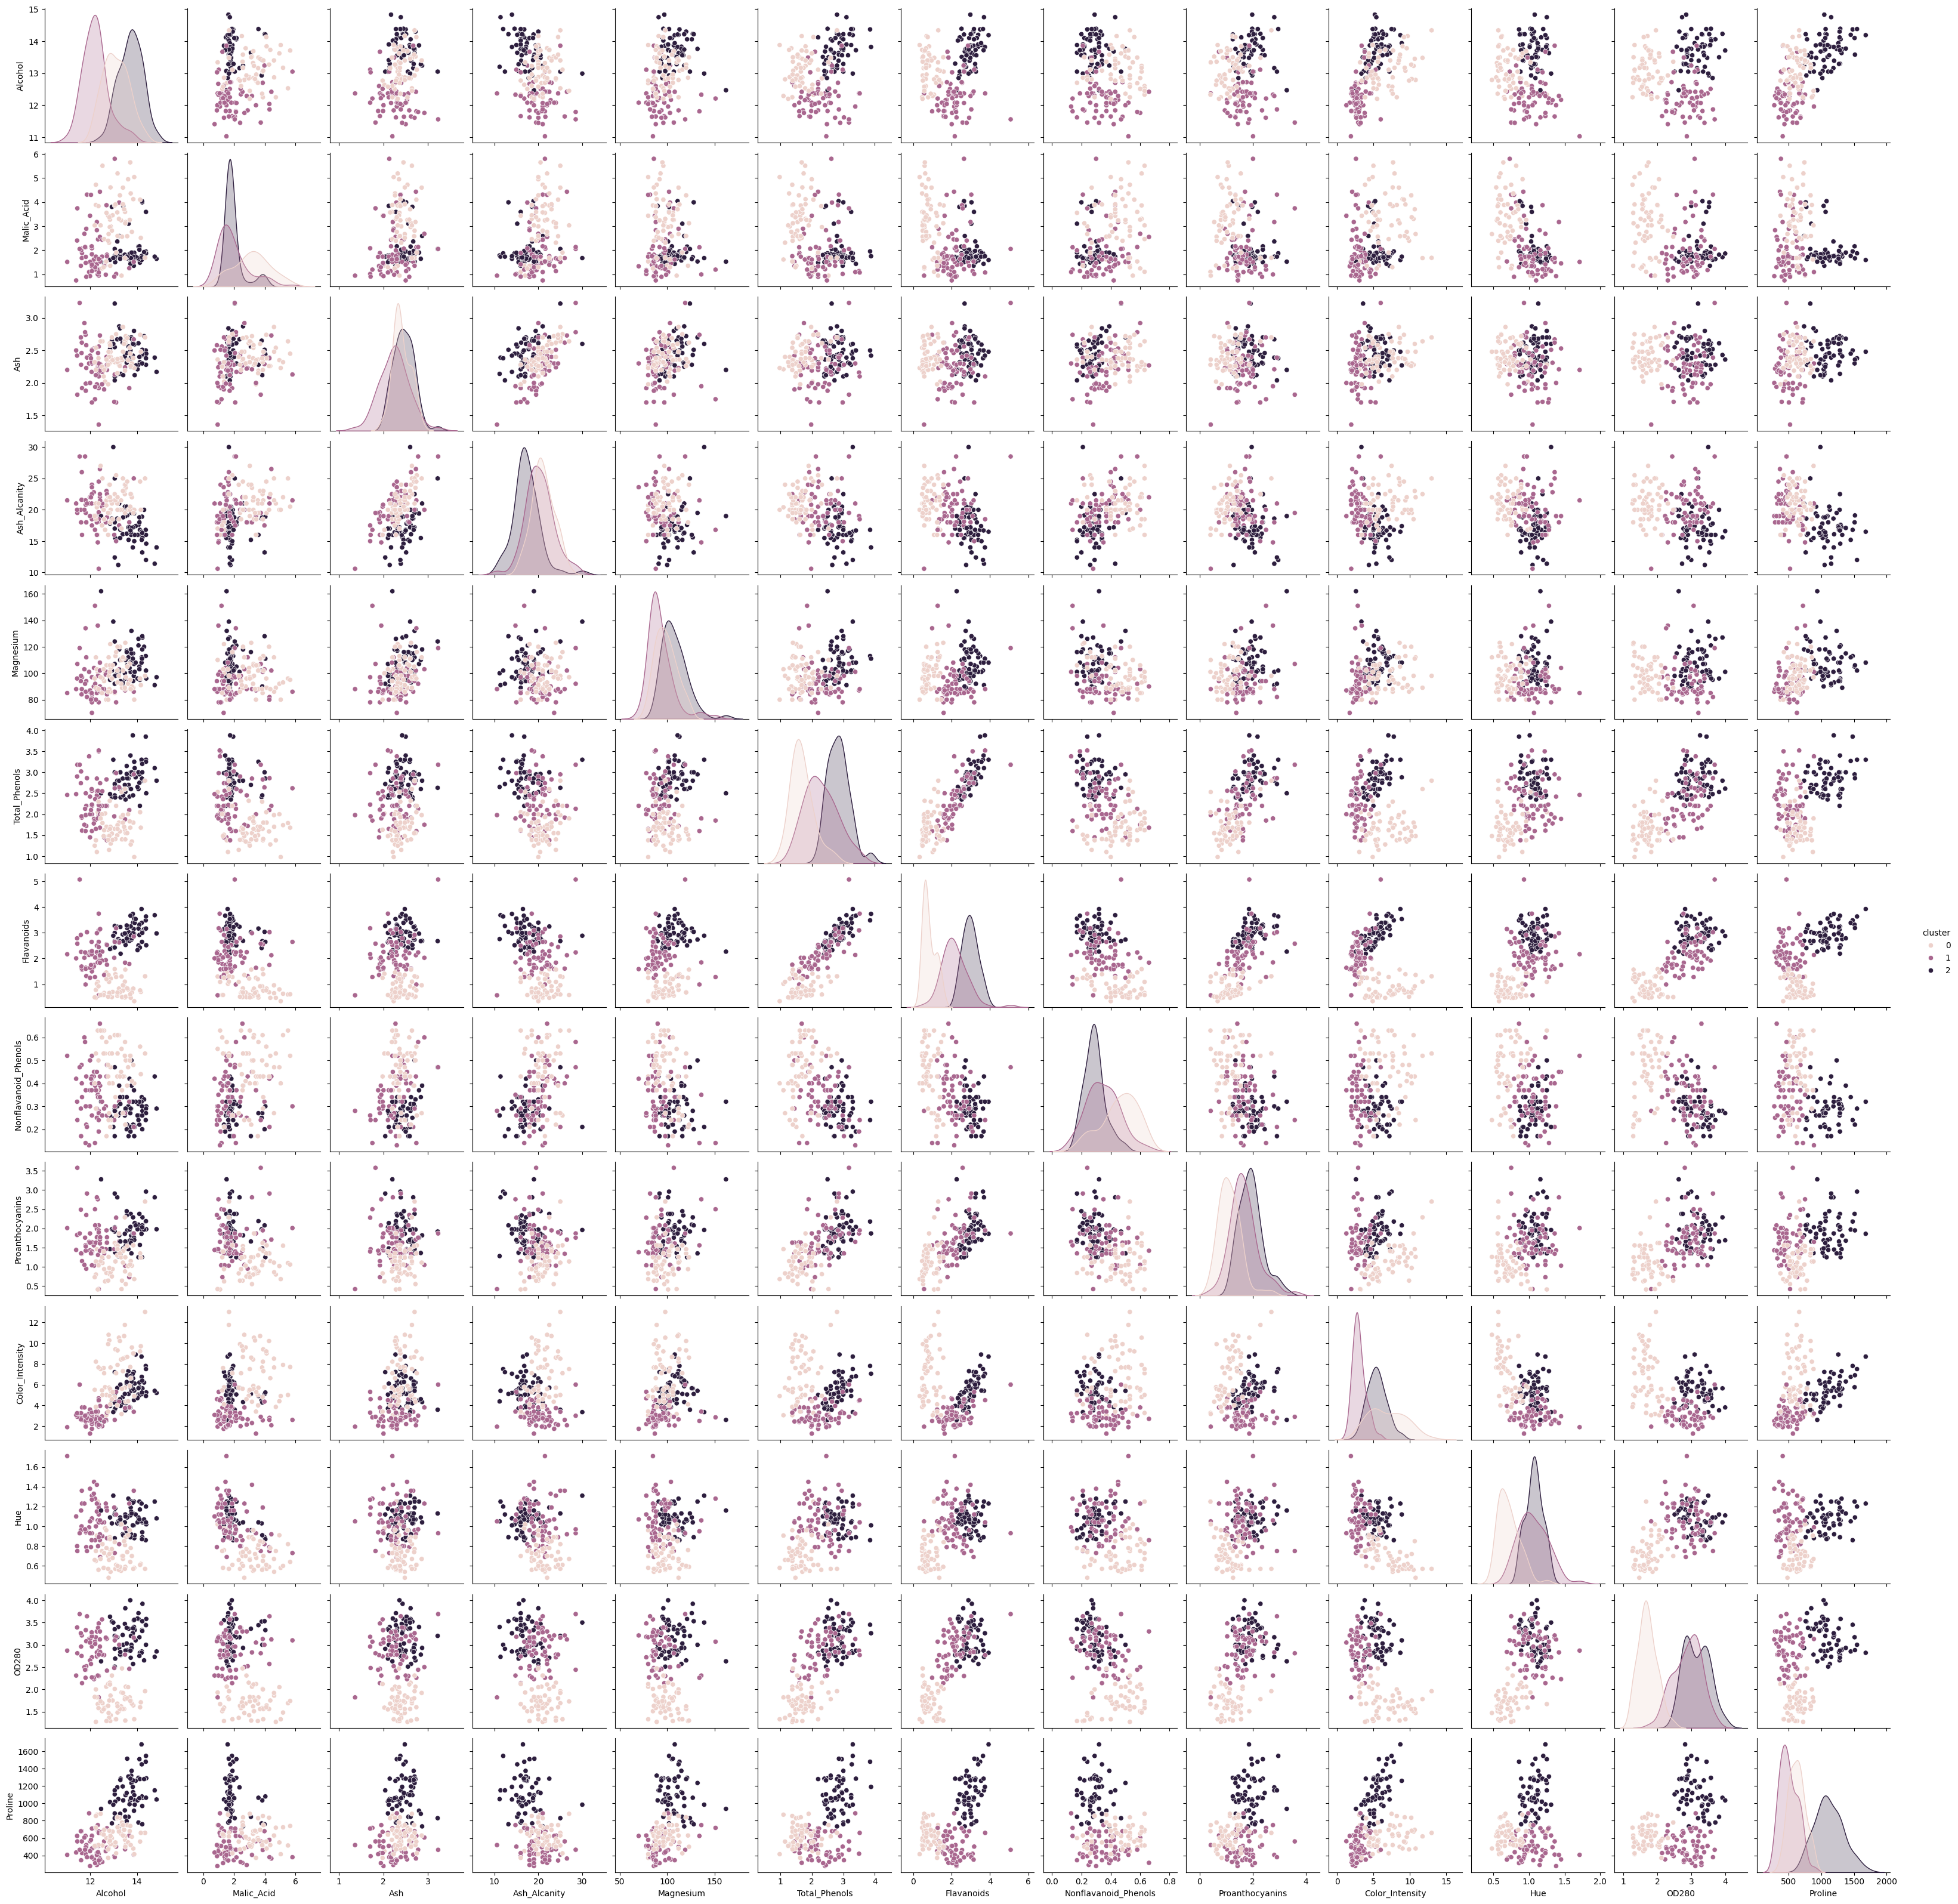

In [24]:
sns.pairplot(data=df,hue='cluster')

In [25]:
cen = kmc.cluster_centers_
cen

array([[0.544689  , 0.47844053, 0.56013612, 0.53833177, 0.31146245,
        0.24476489, 0.10713464, 0.61852487, 0.22827646, 0.4826404 ,
        0.19254989, 0.16090576, 0.24739982],
       [0.31566416, 0.24330259, 0.47330447, 0.49762723, 0.2494824 ,
        0.45495348, 0.38399973, 0.41090147, 0.3973762 , 0.14956119,
        0.47038328, 0.58968545, 0.15846976],
       [0.7077193 , 0.24189723, 0.58636364, 0.34424399, 0.4115942 ,
        0.64327586, 0.55587201, 0.29937107, 0.47865405, 0.35688282,
        0.48116531, 0.69133089, 0.59901331]])

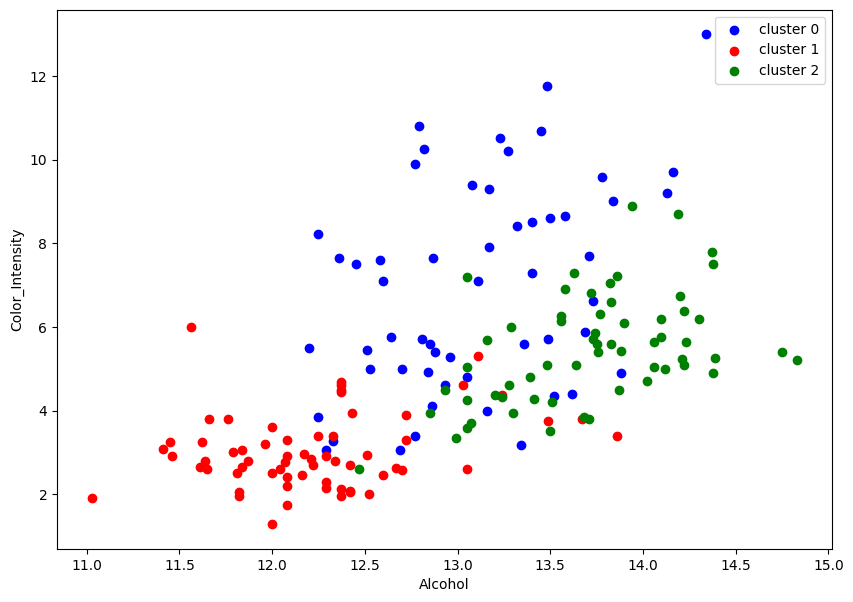

In [26]:
dataframe1 = df[df.cluster==0]
dataframe2 = df[df.cluster==1]
dataframe3 = df[df.cluster==2]

plt.figure(figsize=(10,7))

plt.scatter(dataframe1.Alcohol, dataframe1.Color_Intensity, color='blue', label='cluster 0')
plt.scatter(dataframe2.Alcohol, dataframe2.Color_Intensity, color='red', label='cluster 1')
plt.scatter(dataframe3.Alcohol, dataframe3.Color_Intensity, color='green', label='cluster 2')

plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')

plt.legend()

<Axes: xlabel='Alcohol', ylabel='Color_Intensity'>

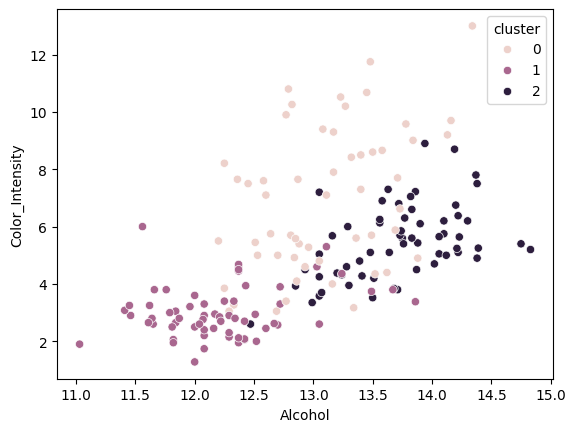

In [27]:
sns.scatterplot(data=df, x='Alcohol', y='Color_Intensity', hue='cluster')


### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


### Based on the cluster analysis and visualizations, we can make the following observations about the characteristics of each cluster:
- Cluster 0: This cluster has the highest alcohol content, and highest Magnesium and Proline content. It also shows moderate levels of color intensity.
- Cluster 1: Wines in this cluster appears to have moderate alcohol,falling in between the other two clusters. and the highest malic acid level among all clusters. Additionally, they show the highest color intensity.
- Cluster 2: Wines in this cluster generally have lower alcohol content, These wines exhibit lowest level of color intensity with lowest malic acid level compared to the other clusters.
## Cluster Naming
Based on the observed characteristics, we can suggest the following potential names or categories for each cluster:

- Cluster 0: High Alcohol Wines / High Magnesium Wines
- Cluster 1: Moderate Wines / High Malic Acid Wines / Intense Color Wines
- Cluster 2: Low Alcohol Wines / Low Color Wines / Low Malic Acid Wines

# Best of Luck